# Dijkstra's algorithm

Dijkstra's algorithm finds the shortest paths between one source and the other nodes in a graph.

## Packages

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import networkx as nx

## User parameters

In [2]:
STARTING_NODE = 5
NUM_NODES = 17
NUM_EDGES = 16

## Generate a graph

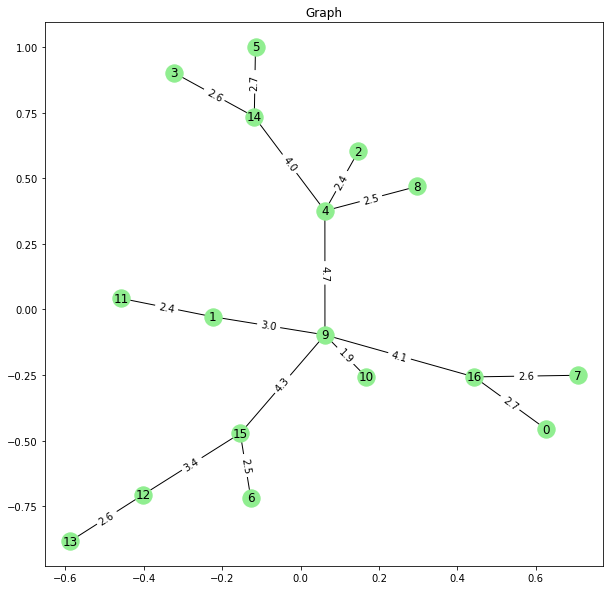

In [3]:
# Create a random graph and extract positions and node_ids
np.random.seed(5)
num_nodes = NUM_NODES
num_edges = NUM_EDGES
G = nx.gnm_random_graph(num_nodes, num_edges, seed=np.random)

node_positions = nx.spring_layout(G)
node_ids = nx.nodes(G)

# Prepare the adjacency distances 
adjacency_list = {}
adjacency_distances = {}
adjacency_labels = {}
for node_id, node_adjacency in G.adjacency():
    adjacencies = list(node_adjacency.keys())
    adjacency_list[node_id] = adjacencies
    distances = []
    for adj_id in adjacencies:
        dist = np.linalg.norm(node_positions[node_id]-node_positions[adj_id])
        dist *= 10.0 # scale up for the display
        distances.append(dist)
        adjacency_labels[(node_id, adj_id)] = "{:.1f}".format(dist)
    adjacency_distances[node_id] = distances

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Graph')
nx.draw(G, pos=node_positions, node_color='lightgreen', with_labels = True,ax=ax)
nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels = adjacency_labels,ax=ax)
ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

## Dijkstra's algorithm

In [4]:
# Node informations which will be updated
distance_from_source = [float('inf')] * num_nodes
previous_node = [-1] * num_nodes # next node on the source graph to get the shortest route to the source

# Set starting Node
distance_from_source[STARTING_NODE] = 0
queue = list(node_ids)

# Dijkstra's algorithm
while len(queue)>0:
    # Find the node with smallest distance 
    node_index = 0;
    node_distance = distance_from_source[queue[node_index]]
    for i in range(len(queue)):
        if distance_from_source[queue[i]] < node_distance:
            node_index = i
            node_distance = distance_from_source[queue[i]]
    # Remove selected node from queue
    node = queue.pop(node_index)
    # Check all the adjacencies of the selected node
    for i, adjacency  in enumerate(adjacency_list[node]):
        adjacency_distance = adjacency_distances[node][i] 
        dist = node_distance + adjacency_distance
        if dist < distance_from_source[adjacency]:
            distance_from_source[adjacency] = dist
            previous_node[adjacency] = node

## Show result

In [5]:
# find the longest path 
furthest_node = np.argmax(distance_from_source)
longest_distance = distance_from_source[furthest_node]

longest_path = []
node = furthest_node
while (node != -1):
    longest_path.append(node)
    node = previous_node[node]

print("the longest distance is {:.1f} ".format(longest_distance))
print("the longest path is ", longest_path)

the longest distance is 21.7 
the longest path is  [13, 12, 15, 9, 4, 14, 5]


In [ ]:
# TODO - add heatmap on the node to show distance
# TODO - add from source to targe
# TODO - show the path in the graph